<a href="https://colab.research.google.com/github/Ashujain263648/SentimentAnalysis/blob/main/sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import nltk
nltk.download('wordnet') # Download the 'wordnet' resource
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
# %%
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# %%
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# %%
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

# %%
df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])
# %%
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)
# %%
import pandas as pd
df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)
print("Shape of the DataFrame:",df.shape)
print(df.sample(5))
# %%
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)
# %%
custom_encoder(df['label'])
# %%
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
# %%
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus
# %%
corpus = text_transformation(df['text'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-5-e83dcd6f6bbd>:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace ="sadness", value =0, inplace=True)


Shape of the DataFrame: (18000, 2)
                                                    text     label
8159   i am not a catholic i certainly don t feel it ...  surprise
7880   i just feel like i did last weeks what im lovi...      love
15437  i feel the clever trickery on the front will c...       joy
6204   ive always been feeling restless and dissatisf...      fear
461    i just remember being so fully stressed out an...       joy


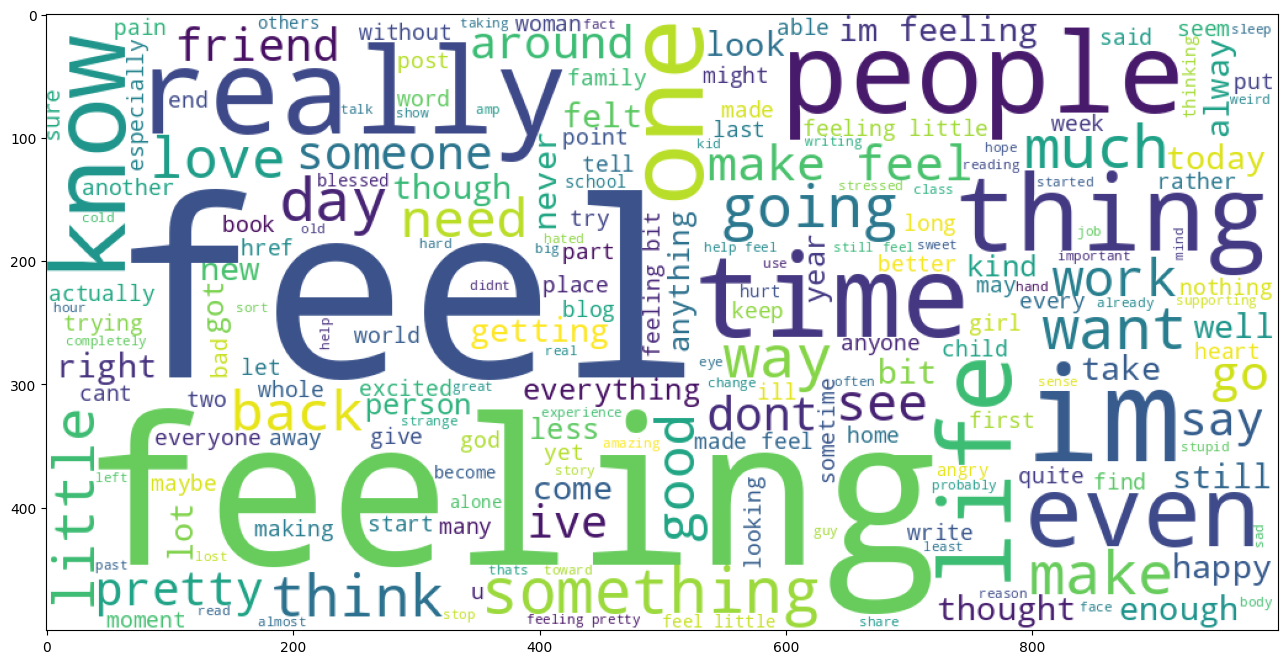

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [7]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

In [8]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

In [19]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import GridSearchCV # import the GridSearchCV class from sklearn.model_selection
from sklearn.ensemble import RandomForestClassifier

# ... your existing code ...

grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1) # Now GridSearchCV should be defined
grid_search.fit(X,y)
grid_search.best_params_

In [ ]:
{
  'bootstrap': True,
  'max_depth': None,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 500
}


In [ ]:
for i in range(432):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

In [ ]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],                                  max_depth=grid_search.best_params_['max_depth'],
                                  n_estimators=grid_search.best_params_['n_estimators'],                                      min_samples_split=grid_search.best_params_['min_samples_split'],                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                    bootstrap=grid_search.best_params_['bootstrap'])
rfc.fit(X,y)

In [ ]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])

In [ ]:
X_test,y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

In [ ]:
plt.rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

In [ ]:
predictions_probability = rfc.predict_proba(testdata)
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()